In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


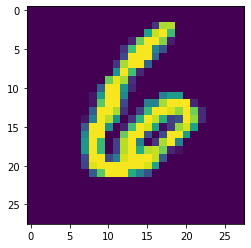

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[13])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False)) #22
model.add(BatchNormalization())
model.add(Dropout(0.15))

#model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11
#model.add(Convolution2D(8, 1, 1, activation='relu')) #22
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

#model.add(Convolution2D(16, 3, 3, activation='relu')) #9


model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#9
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#7
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.15))

# model.add(MaxPooling2D(pool_size=(2, 2)))#11-4

# #model.add(Convolution2D(16, 3, 3, activation='relu'))#7
# #model.add(BatchNormalization())
# #model.add(Dropout(0.2))


# model.add(Convolution2D(8, 1, 1, activation='relu'))#4
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# model.add(Convolution2D(16, 3, 3, activation='relu'))#2
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


#model.add(Convolution2D(10, 4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) #7

model.add(Convolution2D(10, 5))


#model.add(Flatten())
#model.add(GlobalMaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_314 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_213 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_220 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_315 (Conv2D)          (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_214 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_221 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_316 (Conv2D)          (None, 22, 22, 16)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.015 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.015), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.015.
60000/60000 [==============================] - 31s 515us/step - loss: 0.0859 - acc: 0.9738 - val_loss: 0.0597 - val_acc: 0.9808
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0113722517.
60000/60000 [==============================] - 11s 190us/step - loss: 0.0570 - acc: 0.9823 - val_loss: 0.0459 - val_acc: 0.9860
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0091575092.
60000/60000 [==============================] - 11s 190us/step - loss: 0.0454 - acc: 0.9857 - val_loss: 0.0279 - val_acc: 0.9914
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0076647931.
60000/60000 [==============================] - 12s 192us/step - loss: 0.0401 - acc: 0.9872 - val_loss: 0.0337 - val_acc: 0.9898
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0065905097.
60000/60000 [==

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019932233119336888, 0.9947]
